<a href="https://colab.research.google.com/github/htapiagroup/oscilaciones-de-masas-acopladas-por-resortes-DavidRogelioMC/blob/master/Tarea_MasasAcopladasResorte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema de masas acopladas por resortes.

## Caso de dos masas

El hamiltoniano para dos masas acopladas por medio de tres resortes estáá dado por,

$$ H = \frac{1}{2m}p_1^2 + \frac{1}{2m}p_2^2 +\frac{1}{2}k_1x_1^2 + \frac{1}{2} k_3x_2^2 + \frac{1}{2} k_2 (x_2 - x_1)^2 $$

Por consiguiente las ecuaciones de movimento serán:

\begin{align}
\dot{p}_1 & = - \frac{\partial H}{\partial x_1} = - k_1 x_1 + k_2(x_2 - x_1) \\
\dot{p}_2 & = - \frac{\partial H}{\partial x_2} = -k_3 x_2 - k_2 ( x_2 - x_1) \\
\dot{q}_0 = \dot{x}_1 & = \frac{\partial H}{\partial p_1} = \frac{p_1}{m_1} \\
\dot{q}_1 = \dot{x}_2 & = \frac{\partial H}{\partial p_2} = \frac{p_2}{m_2}
\end{align}


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import time

En principio se toma el código que se hizo en clase; se agregan algunas líneas para que este, nos indique el tiempo que le toma ejecutarse.

In [0]:
k1 = 1.0
k2 = 1.0
k3 = 1.0
m1 = 1.0
m2 = 1.0

def Q_Dot(f):
  x1, x2 = f[0],f[1]
  p1, p2 = f[2], f[3]
  x1_dot = p1/m1
  x2_dot= p2/m2
  p1_dot = - k1*x1 + k2*( x2 - x1 )
  p2_dot =  - k3*x2 - k2*( x2 - x1 )
  return np.asarray([x1_dot,x2_dot,p1_dot,p2_dot])

In [0]:
def paso_euler(f,t_n,y_n,dt):
  y_dot = f(t_n,y_n)
  y_n_mas_1 = y_n +dt*y_dot
  return y_n_mas_1

def campo_vectorial(f, t, y_0, dt):
  tiempo = time.time()

  t_0, t_f = t
  n = int((t_f - t_0)/dt)
  d = len(y_0)
  y_tray = np.zeros(((n+1),d))
  t = np.linspace(t_0,t_f,n+1)
  y_tray[0,:] = y_0

  tiempo = time.time() - tiempo
  
  for i in range(n):
    y_tray[i+1,:] = paso_euler(f,t[i],y_tray[i,:],dt)

  print('Tiempo de computo = ' + ('%.5f' %tiempo) + 's')
  
  return t, y_tray

def Q_dot_t(t,y):
    return Q_Dot(y)

Tiempo de computo = 0.00619s


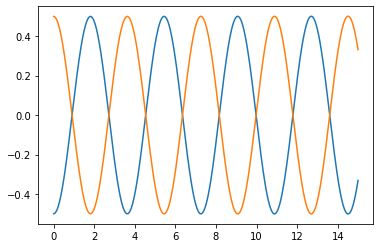

In [40]:
t, Q_Traj = campo_vectorial(Q_dot_t,[0,15],[-0.5,0.5,0.,0],0.0001)

plt.plot(t,Q_Traj[:,0])
plt.plot(t,Q_Traj[:,1])

## Energía

Se procede a graficar la energía del sistema, para ello se construye el Hamiltoniano y se plotea este vs el tiempo.

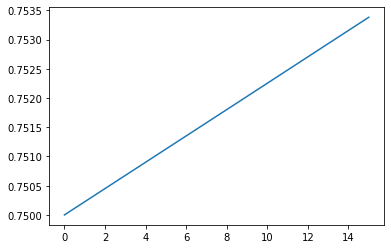

In [41]:
H = np.zeros((Q_Traj.shape[0],1))
H[:,0] = (1/2)*(Q_Traj[:,2]**2/m1 + Q_Traj[:,2]**2/m2 + k1*Q_Traj[:,0]**2 + k3*Q_Traj[:,1]**2 + k2*(Q_Traj[:,1] - Q_Traj[:,0])**2)
plt.plot(t,H[:,0])

Aparentemente, la energía no se conserva, sin enbargo esto no es del todo cierto; se aprecia en el eje de las ordenadas de la grááfica de arriba que, el cambio de energía no es mucho, de hecho, la variación de energía es debido a errores numéricos.

Si aumentamos el intervalo *dt* entonces observaríamos un mínimo cambio de la energía. Esto se aprecia aún más si se grafica las posiciones y energías de los resortes juntos. A continuación se hace tal acción:

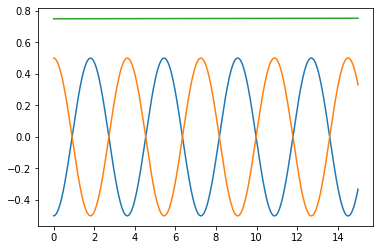

In [42]:
plt.plot(t,Q_Traj[:,0])
plt.plot(t,Q_Traj[:,1])
H = np.zeros((Q_Traj.shape[0],1))
H[:,0] = (1/2)*(Q_Traj[:,2]**2/m1 + Q_Traj[:,2]**2/m2 + k1*Q_Traj[:,0]**2 + k3*Q_Traj[:,1]**2 + k2*(Q_Traj[:,1] - Q_Traj[:,0])**2)
plt.plot(t,H[:,0])

La recta verde representa la energía del sistema, como se aprecia aúún no es totalmente constante, no obstante, si uno incrementa el espaciamiento el error numérico se hace menos grande, dando como resultado que la energía en verdad se conserva.

## Distinos parámetros y condiciones inciales.

Para el mismo sistema de dos masas, se elaboran diferentes gráficas con distintos parámetros, esto es: masa, condiciones iniciales y constantes de restitución de los resortes.

Tiempo de computo = 0.00056s


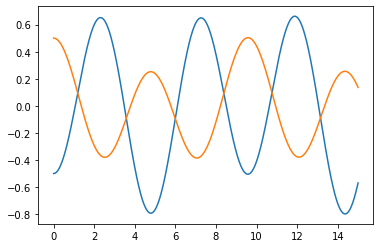

In [43]:
# Mismas condiciones iniciales, distintos parámetros
k1=0.3
k2 = 0.9
k3 = 1.0
m1 = 1.0
m2 = 2.0

t, Q_Traj = campo_vectorial(Q_dot_t,[0,15],[-0.5,0.5,0.,0],0.001)

plt.plot(t,Q_Traj[:,0])
plt.plot(t,Q_Traj[:,1])

Tiempo de computo = 0.00025s


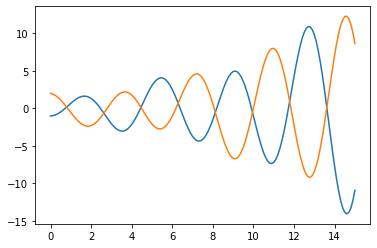

In [44]:
# Mismos parámetros, distintas condiciones inciales
k1=1.0
k2 = 1.0
k3 = 1.0
m1 = 1.0
m2 = 1.0

t, Q_Traj = campo_vectorial(Q_dot_t,[0,15],[-1,2,0.3,-0.8],0.1)

plt.plot(t,Q_Traj[:,0])
plt.plot(t,Q_Traj[:,1])

Tiempo de computo = 0.00021s


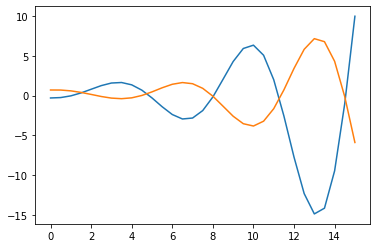

In [45]:
# Distintas condiciones y parámetros
k1=0.9
k2 = 3.0
k3 = 0.1
m1 = 5.0
m2 = 8.0

t, Q_Traj = campo_vectorial(Q_dot_t,[0,15],[-0.3,0.7,0.5,-0.1],0.5)

plt.plot(t,Q_Traj[:,0])
plt.plot(t,Q_Traj[:,1])

Como se aprecia en la figura anterior, la energía se conserva para cualquier tiempo t.

# Problema para n masas.

Para n masas acopladas, primero se elabora el hamiltoniano general que describe al sistema. Dicho hamiltoniano para *n* masas acopladas por medio de *n+1* resortes está dado por,

$$ H = \frac{1}{2m}p_1^2 + \ldots + \frac{1}{2m}p_n^2 +\frac{1}{2}k_1x_1^2 + \ldots + \frac{1}{2} k_i (x_i - x_{i-1})^2 + \ldots + \frac{1}{2}k_nx_n^2$$

Se resolverá este problema con masas y constantes de los resortes iguales respectivamente. Después, el hamiltoniano puede ser escrito en términos de sumas, como sigue

$$ H = \sum_{i=1}^N \frac{p_i^2}{2m} + \sum_{i=0}^N\frac{k}{2}(u_{i+1}-u_i) $$

Por consiguiente las ecuaciones de movimento serán:

\begin{align}
\dot{x}_i & = \frac{\partial H}{\partial p_i} = \frac{p_i}{m} \\ \\
\dot{p}_i & = - \frac{\partial H}{\partial x_i} = k(x_{i+1}-2x_i+2x_{i-1})
\end{align}

Primero se corrobora que para dos masas, bajo las mismas condiciones iniciales se obtienen los mismo resultados que la gráfica uno.

En primera instancia, se procede a vectorizar el código del principio; en particular, cuando uno construye las velocidades y fuerzas de las ecuaciones de hamilton (i.e., $\dot{x}$ y $\dot{p}$).

In [46]:
# Este esta es la parte del código que no se vectorizó al inicio (caso general). Se propone lo siguiente.

# Masas y constantes de resortes iguales.
m = 1.0
k = 1.0

# El usuario ingresa cuántas masas (n) quiere en el siatema.
n = int(input('Dame el número de masas acopladas en el sistema unidimensional: '))

# Condiciones inciales
Cx = [] # Condiciones iniciales en x
Cp = [] # Condiciones iniciales de momentos (momentos derivados respecto del tiempo, p_dot)
C = [] 

print('Condiciones iniciales en la posicisión')
for t in range (1,int(n)+1):
  Cx.append(float(input('Dame la posición inicial de la masa '+str(t)+' :')))

print('Condiciones iniciales de los momentos derivados ')
for T in range (1,int(n)+1):
  Cp.append(float(input('Dame el momento incial de la masa '+str(T)+' :')))

C = np.asarray(Cx+Cp) # Vector de condiciones iniciales [x,p]

def Q2_dot(f):
  X = []
  P = []
  X_DOT = []
  P_DOT = []
  # Se construye primero el vector de posiciones
  for i in range (int(n)):
    X.append(float(f[i]))
  # Como ya se ocuparon loa primeros n-1 espacios de la función f, entonces se propone el intervalo de abajo para p
  for j in range (int(n),2*int(n)):
    P.append(float(f[j]))
  for l in range (int(n)):
    X_DOT.append(float(P[l]/m))
  for item in range (int(n)):
    X.append(0) # Se agrega el elemento cero para evitar problemas con el elemento X[-1] y X[n+1]. Al hacer cero estos elementos, no afectan la solución
    P_DOT.append(k*(X[item+1]-2*X[item]+X[item-1]))
    X.pop(n) # Se elimina el cero que se agregó arriba, i.e., el último elemento para no afectar la solución.
  X_DOT.extend(P_DOT) # Al vector de xdot, se le anexa el vector pdot, para posteriormente usarlo en el def principal.
  return np.asarray(X_DOT)
  del X_DOT[:] # Se vacía o reinicia la lista xdot, para cuando se vuelva a entrar al ciclo def de Qdot, no contribuyan los xdot de ciclos anteriores.

Dame el número de masas acopladas en el sistema unidimensional: 2
Condiciones iniciales en la posicisión
Dame la posición inicial de la masa 1 :-0.5
Dame la posición inicial de la masa 2 :0.5
Condiciones iniciales de los momentos derivados 
Dame el momento incial de la masa 1 :0
Dame el momento incial de la masa 2 :0


Las siguientes líneas de código son las mismas que al inicio, dicho de otro modo, las que se elaboraron en clase.

A continuación se agrega en esta sección de código, la línea para graficar.

In [0]:
def campo_vectorial_2(f, t, y_0, dt):
  tiempo = time.time()

  t_0, t_f = t
  n = int((t_f - t_0)/dt)
  d = len(y_0)
  y_tray = np.zeros(((n+1),d))
  t = np.linspace(t_0,t_f,n+1)
  y_tray[0,:] = y_0
  
  tiempo = time.time() - tiempo
  
  for i in range(n):
    y_tray[i+1,:] = paso_euler(f,t[i],y_tray[i,:],dt)

  print('Tiempo de computo = ' + ('%.5f' %tiempo) + 's')

  return t, y_tray

def Q2_dot_t(t,y):
    return Q2_dot(y)

Tiempo de computo = 0.00066s


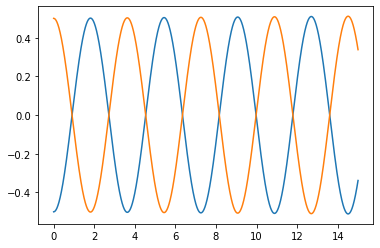

In [48]:
t, Q_Traj = campo_vectorial_2(Q2_dot_t,[0,15],C,0.001)

for r in range(n):
  plt.plot(t,Q_Traj[:,r])

Ahora investiguemos el comportamiento del sistema para 5 masas acopladas.

In [49]:
m = 1.0
k = 1.0

n = int(input('Dame el número de masas acopladas en el sistema unidimensional: '))

Cx = [] 
Cp = [] 
C = [] 

print('Condiciones iniciales en la posicisión')
for t in range (1,int(n)+1):
  Cx.append(float(input('Dame la posición inicial de la masa '+str(t)+' :')))

print('Condiciones iniciales de los momentos lineales p')
for T in range (1,int(n)+1):
  Cp.append(float(input('Dame el momento incial de la masa '+str(T)+' :')))

C = np.asarray(Cx+Cp) 

def Q2_dot(f):
  X = []
  P = []
  X_DOT = []
  P_DOT = []
  for i in range (int(n)):
    X.append(float(f[i]))
  for j in range (int(n),2*int(n)):
    P.append(float(f[j]))
  for l in range (int(n)):
    X_DOT.append(float(P[l]/m))
  for item in range (int(n)):
    X.append(0) 
    P_DOT.append(k*(X[item+1]-2*X[item]+X[item-1]))
    X.pop(n) 
  X_DOT.extend(P_DOT) 
  return np.asarray(X_DOT)
  del X_DOT[:]

Dame el número de masas acopladas en el sistema unidimensional: 5
Condiciones iniciales en la posicisión
Dame la posición inicial de la masa 1 :-0.3
Dame la posición inicial de la masa 2 :-0.1
Dame la posición inicial de la masa 3 :0
Dame la posición inicial de la masa 4 :0.1
Dame la posición inicial de la masa 5 :0.3
Condiciones iniciales de los momentos lineales p
Dame el momento incial de la masa 1 :0
Dame el momento incial de la masa 2 :0
Dame el momento incial de la masa 3 :0
Dame el momento incial de la masa 4 :0
Dame el momento incial de la masa 5 :0


Tiempo de computo = 0.00220s


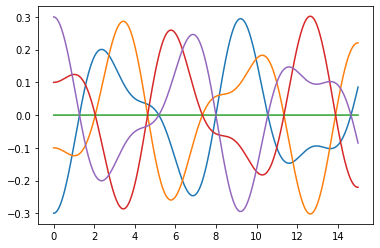

In [50]:
t, Q_Traj = campo_vectorial_2(Q2_dot_t,[0,15],C,0.001)

for r in range(n):
  plt.plot(t,Q_Traj[:,r])

## Energía del sistema para *n* masas acopladas.

Para *n* masas acopladas se puede usar el código anterior $n=5$, sin embargo esas líneas sirven para cualquier *n*. Con los datos del ejercicio anterior se procede a calcular la energía, muy similarmente a los casos anteriores.

In [69]:
H = np.zeros((Q_Traj.shape[0],1))
N = int(n)
H[:,0] = (1/2*m)*(Q_Traj[:,N:2*N])**2 + (k/2)*(Q_Traj[:,0:N] - Q_Traj[:,-1:N-1])**2
plt.plot(t,H)

ValueError: ignored